In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Update these file paths to match your files
FEATURES_FILE1 = 'zeopp_final_results.csv'  # Your Zeo++ features
# FEATURES_FILE2 = '../pca_soap_mofs.csv'
# LABELS_FILE = '../id_labels.csv'           # Your labels file
FEATURES_FILE2 = '../pca_soap_mofs_6k.csv'
LABELS_FILE = '../comb_id_labels.csv'           # Your labels file
TARGET_COL = 'label'         # Your target variable

select_f = ["filename"]
# Load data
print("Loading features...")
feat1 = pd.read_csv(FEATURES_FILE1)[select_f]
feat1["filename"] = feat1["filename"].astype(str).str.strip()
feat2 = pd.read_csv(FEATURES_FILE2)
feat2["filename"] = feat2["filename"].astype(str).str.strip(".cif")
# features_df = pd.merge(feat1, feat2, on='filename', how='inner')
features_df = feat2

# Clean whitespace from filename column
features_df['filename'] = features_df['filename'].astype(str).str.strip()
print(f"Features shape: {features_df.shape}")
print(f"Feature columns: {list(features_df.columns)}")

print("\nLoading labels...")
labels_df = pd.read_csv(LABELS_FILE)
# Rename 'id' column to 'filename' to match features and clean whitespace
labels_df = labels_df.rename(columns={'id': 'filename'})
labels_df['filename'] = labels_df['filename'].astype(str).str.strip()
print(f"Labels shape: {labels_df.shape}")
print(f"Label columns: {list(labels_df.columns)}")

# Display first few rows
print("\nFirst 5 rows of features:")
display(features_df.head())

print("\nFirst 5 rows of labels:")
display(labels_df.head())

# Check if filenames match now
print("\nFilename matching check:")
print("Sample features filenames:", features_df['filename'].head(3).tolist())
print("Sample labels filenames:", labels_df['filename'].head(3).tolist())

Loading features...
Features shape: (6089, 511)
Feature columns: ['C-C_1', 'C-C_2', 'C-Fe_1', 'C-Fe_2', 'C-H_1', 'C-H_2', 'C-N_1', 'C-N_2', 'C-O_1', 'C-O_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H_1', 'Fe-H_2', 'Fe-N_1', 'Fe-N_2', 'Fe-O_1', 'Fe-O_2', 'H-H_1', 'H-H_2', 'H-N_1', 'H-N_2', 'H-O_1', 'H-O_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'O-O_1', 'O-O_2', 'filename', 'C-Zn_1', 'C-Zn_2', 'H-Zn_1', 'H-Zn_2', 'N-Zn_1', 'N-Zn_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'C-F_1', 'C-F_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'C-Cu_1', 'C-Cu_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-F_1', 'Cu-F_2', 'Cu-H_1', 'Cu-H_2', 'Cu-N_1', 'Cu-N_2', 'Cu-O_1', 'Cu-O_2', 'C-Cl_1', 'C-Cl_2', 'Cl-Cl_1', 'Cl-Cl_2', 'Cl-H_1', 'Cl-H_2', 'Cl-N_1', 'Cl-N_2', 'Cl-O_1', 'Cl-O_2', 'Cl-Zn_1', 'Cl-Zn_2', 'C-Li_1', 'C-Li_2', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'Li-Li_2', 'Li-O_1', 'Li-O_2', 'Li-Zn_1', 'Li-Zn_2', 'Cl-Cu_1', 'Cl-Cu_2', 'F-Fe_1', 'F-Fe_2', 'C-S_1', 'C-S_2', 'H-S_1', 'H-S_2', 

,C-C_1,C-C_2,C-Fe_1,C-Fe_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_1,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2
0,-3.443530,-0.054908,-3.706784,-0.000939,-0.046725,-0.001103,-1.450265e-01,-1.348237e-03,-0.001538,-0.000537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.601644,-0.067622,0.000000,0.000000,-2.998990,-0.037256,-1.253874e+00,-2.712316e-03,0.050734,-0.008219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.571150,-0.014238,0.000000,0.000000,0.004495,0.000744,4.125319e-01,1.128114e-02,0.000016,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.142464,-0.070747,0.000000,0.000000,-4.332294,-0.028151,-1.425224e-01,-1.319055e-02,-0.016620,0.005835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.091894,-0.048785,0.000000,0.000000,-0.341973,-0.002109,-7.675789e-07,-3.787146e-08,-0.022441,-0.000738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



First 5 rows of labels:


,filename,label
0,DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat,13.791591
1,DB0-m2_o8_o23_f0_pcu.sym.80_repeat,3.786996
2,DB0-m29_o90_o1500_f0_pts.sym.31_repeat,9.382537
3,DB0-m3_o48_o25_f0_fsc.sym.3_repeat,11.650365
4,DB0-m2_o1_o9_f0_nbo.sym.104_repeat,1.412915



Filename matching check:
Sample features filenames: ['DB0-m29_o91_o44_f0_pts.sym.69_repeat', 'DB0-m3_o1500_o13_f0_fsc.sym.25_repeat', 'DB0-m3_o10_o25_f0_pcu.sym.23_repeat']
Sample labels filenames: ['DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat', 'DB0-m2_o8_o23_f0_pcu.sym.80_repeat', 'DB0-m29_o90_o1500_f0_pts.sym.31_repeat']


In [4]:
# Merge datasets
print("Merging features and labels...")
merged_df = pd.merge(features_df, labels_df, on='filename', how='inner')
print(f"Merged data shape: {merged_df.shape}")
print(f"Successfully merged {len(merged_df)} samples")

# Check for any missing merges
feature_files = set(features_df['filename'])
label_files = set(labels_df['filename'])
print(f"\nFiles in features only: {len(feature_files - label_files)}")
print(f"Files in labels only: {len(label_files - feature_files)}")
print(f"Files in both: {len(feature_files.intersection(label_files))}")

display(merged_df.head())

Merging features and labels...
Merged data shape: (6089, 512)
Successfully merged 6089 samples

Files in features only: 0
Files in labels only: 0
Files in both: 6089


,C-C_1,C-C_2,C-Fe_1,C-Fe_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2,label
0,-3.443530,-0.054908,-3.706784,-0.000939,-0.046725,-0.001103,-1.450265e-01,-1.348237e-03,-0.001538,-0.000537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.203310
1,-3.601644,-0.067622,0.000000,0.000000,-2.998990,-0.037256,-1.253874e+00,-2.712316e-03,0.050734,-0.008219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.691120
2,-1.571150,-0.014238,0.000000,0.000000,0.004495,0.000744,4.125319e-01,1.128114e-02,0.000016,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.494934
3,-4.142464,-0.070747,0.000000,0.000000,-4.332294,-0.028151,-1.425224e-01,-1.319055e-02,-0.016620,0.005835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.736934
4,-3.091894,-0.048785,0.000000,0.000000,-0.341973,-0.002109,-7.675789e-07,-3.787146e-08,-0.022441,-0.000738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.544133


In [5]:
# Preprocess features
print("Preprocessing data...")

# Get feature columns (exclude filename and target)
feature_cols = [col for col in merged_df.columns if col not in ['filename', TARGET_COL]]
print(f"Feature columns ({len(feature_cols)}): {feature_cols}")

# Convert 'NA' strings to NaN and make numeric
for col in feature_cols:
    if merged_df[col].dtype == 'object':
        merged_df[col] = merged_df[col].replace('NA', np.nan)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Check missing values
print("\nMissing values per column:")
missing_counts = merged_df[feature_cols + [TARGET_COL]].isnull().sum()
print(missing_counts[missing_counts > 0])

# Remove rows with missing target
initial_rows = len(merged_df)
merged_df = merged_df.dropna(subset=[TARGET_COL])
final_rows = len(merged_df)
print(f"\nRemoved {initial_rows - final_rows} rows with missing target values")
print(f"Final dataset size: {final_rows} samples")

Preprocessing data...
Feature columns (510): ['C-C_1', 'C-C_2', 'C-Fe_1', 'C-Fe_2', 'C-H_1', 'C-H_2', 'C-N_1', 'C-N_2', 'C-O_1', 'C-O_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H_1', 'Fe-H_2', 'Fe-N_1', 'Fe-N_2', 'Fe-O_1', 'Fe-O_2', 'H-H_1', 'H-H_2', 'H-N_1', 'H-N_2', 'H-O_1', 'H-O_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'O-O_1', 'O-O_2', 'C-Zn_1', 'C-Zn_2', 'H-Zn_1', 'H-Zn_2', 'N-Zn_1', 'N-Zn_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'C-F_1', 'C-F_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'C-Cu_1', 'C-Cu_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-F_1', 'Cu-F_2', 'Cu-H_1', 'Cu-H_2', 'Cu-N_1', 'Cu-N_2', 'Cu-O_1', 'Cu-O_2', 'C-Cl_1', 'C-Cl_2', 'Cl-Cl_1', 'Cl-Cl_2', 'Cl-H_1', 'Cl-H_2', 'Cl-N_1', 'Cl-N_2', 'Cl-O_1', 'Cl-O_2', 'Cl-Zn_1', 'Cl-Zn_2', 'C-Li_1', 'C-Li_2', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'Li-Li_2', 'Li-O_1', 'Li-O_2', 'Li-Zn_1', 'Li-Zn_2', 'Cl-Cu_1', 'Cl-Cu_2', 'F-Fe_1', 'F-Fe_2', 'C-S_1', 'C-S_2', 'H-S_1', 'H-S_2', 'N-S_1', 'N-S_2', 'O-S_1', 'O-S_

Dataset statistics:


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

             C-C_1        C-C_2       C-Fe_1       C-Fe_2        C-H_1  \
count  6089.000000  6089.000000  6089.000000  6089.000000  6089.000000   
mean     -3.480541    -0.052582    -0.173746    -0.000289    -1.560242   
std       2.941894     0.061653     1.016941     0.021912     2.001346   
min     -18.230070    -0.408789    -5.317513    -0.228912   -10.519075   
25%      -4.382311    -0.069563     0.000000     0.000000    -3.262001   
50%      -3.055145    -0.054196     0.000000     0.000000    -0.441937   
75%      -2.191209    -0.040465     0.000000     0.000000    -0.072535   
max      22.386817     0.344046     6.438078     0.255145     6.297634   

             C-H_2        C-N_1        C-N_2        C-O_1        C-O_2  ...  \
count  6089.000000  6089.000000  6089.000000  6089.000000  6089.000000  ...   
mean     -0.008606    -0.141363    -0.002799    -0.018382     0.000520  ...   
std       0.026771     0.428608     0.010109     0.301312     0.008301  ...   
min      -0.19992

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

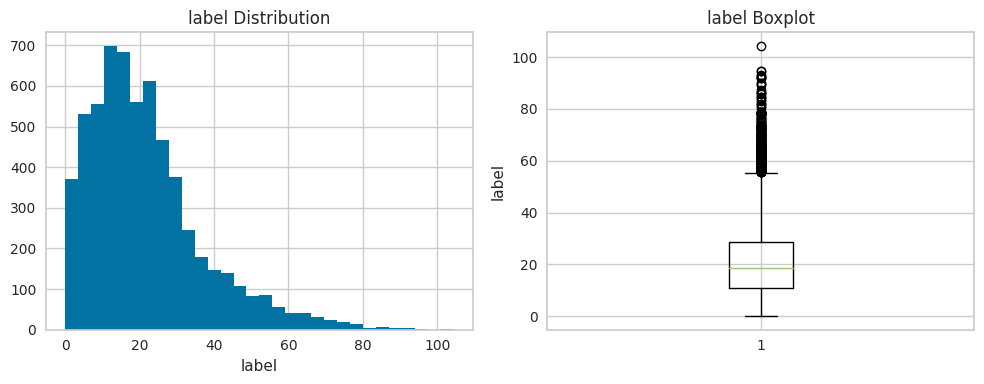

In [6]:
# Basic statistics
print("Dataset statistics:")
print(merged_df[feature_cols + [TARGET_COL]].describe())

# Target variable analysis
print(f"\nTarget variable: {TARGET_COL}")
if merged_df[TARGET_COL].dtype in ['int64', 'float64']:
    print("Target statistics:")
    print(merged_df[TARGET_COL].describe())
    
    # Plot target distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    merged_df[TARGET_COL].hist(bins=30)
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(merged_df[TARGET_COL])
    plt.title(f'{TARGET_COL} Boxplot')
    plt.ylabel(TARGET_COL)
    plt.tight_layout()
    plt.show()
else:
    print("Target value counts:")
    print(merged_df[TARGET_COL].value_counts())
    
    # Plot target distribution
    plt.figure(figsize=(8, 5))
    merged_df[TARGET_COL].value_counts().plot(kind='bar')
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
# Prepare final dataset for machine learning
ml_data = merged_df[[TARGET_COL] + feature_cols].copy()

print(f"ML dataset shape: {ml_data.shape}")
print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(ml_data)}")

# Check final data quality
print("\nFinal data info:")
print(ml_data.info())

# Determine task type
target_unique = merged_df[TARGET_COL].nunique()
if merged_df[TARGET_COL].dtype in ['int64', 'float64'] and target_unique > 10:
    TASK_TYPE = 'regression'
    print(f"\nDetected REGRESSION task (continuous target with {target_unique} unique values)")
else:
    TASK_TYPE = 'classification'
    print(f"\nDetected CLASSIFICATION task ({target_unique} classes)")

print(f"Task type: {TASK_TYPE}")

ML dataset shape: (6089, 511)
Features: 510
Samples: 6089

Final data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6089 entries, 0 to 6088
Columns: 511 entries, label to Sm-Sm_2
dtypes: float64(511)
memory usage: 23.7 MB
None

Detected REGRESSION task (continuous target with 6049 unique values)
Task type: regression


In [8]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Setting up regression environment with normalization...")
    
    reg = setup(
            data=ml_data,
            target=TARGET_COL,
            train_size=0.8,
            session_id=123,
            # silent=True,
            fold=5,
            # Minimal preprocessing
            normalize=True,          # Only keep normalization
            transformation=False,    # Disable transformation
            remove_outliers=False,   # Disable outlier removal
            feature_selection=False, # Disable feature selection
        )
    
    print("Regression setup complete with preprocessing!")

Setting up regression environment with normalization...


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Regression
3,Original data shape,"(6089, 511)"
4,Transformed data shape,"(6089, 511)"
5,Transformed train set shape,"(4871, 511)"
6,Transformed test set shape,"(1218, 511)"
7,Numeric features,510
8,Preprocess,True
9,Imputation type,simple


Regression setup complete with preprocessing!


In [9]:
# Check what preprocessing was applied
print("=== PREPROCESSING SUMMARY ===")
print("\nDataset shape after preprocessing:")
print(f"Training features: {get_config('X_train').shape}")
print(f"Test features: {get_config('X_test').shape}")

# Show what transformations were applied
print(f"\nFeatures after preprocessing: {len(get_config('X_train').columns)}")
print(f"Original features: {len(feature_cols)}")

if len(get_config('X_train').columns) != len(feature_cols):
    print(f"Feature selection removed: {len(feature_cols) - len(get_config('X_train').columns)} features")

# Show sample of processed data
print("\nSample of preprocessed training data:")
display(get_config('X_train').head())

print("\nPreprocessed data statistics:")
display(get_config('X_train').describe())

# Check if normalization worked (should have mean~0, std~1)
means = get_config('X_train').mean()
stds = get_config('X_train').std()
print(f"\nNormalization check:")
print(f"Feature means range: {means.min():.3f} to {means.max():.3f} (should be near 0)")
print(f"Feature stds range: {stds.min():.3f} to {stds.max():.3f} (should be near 1)")

=== PREPROCESSING SUMMARY ===

Dataset shape after preprocessing:
Training features: (4871, 510)
Test features: (1218, 510)

Features after preprocessing: 510
Original features: 510

Sample of preprocessed training data:


,C-C_1,C-C_2,C-Fe_1,C-Fe_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_1,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2
3077,-3.818387,-0.039896,0.000000,0.000000,-0.460765,-0.002077,0.221152,0.000919,0.006313,0.011789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5414,-2.127572,-0.047756,0.000000,0.000000,-0.134881,-0.007430,-0.514177,0.002462,0.010671,-0.000016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,-3.997377,-0.067854,0.000000,0.000000,-0.411920,-0.001952,-0.058828,-0.000855,-0.005855,-0.000345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,-3.468239,-0.045971,0.000000,0.000000,-0.249490,-0.011389,0.000000,0.000000,-0.000010,-0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3807,-2.334378,-0.052521,-3.314322,-0.045786,-0.152046,-0.001573,-0.198653,-0.004802,-0.002451,-0.000506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Preprocessed data statistics:


,C-C_1,C-C_2,C-Fe_1,C-Fe_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_1,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2
count,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,...,4871.000000,4.871000e+03,4.871000e+03,4.871000e+03,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4.871000e+03
mean,-3.496804,-0.052519,-0.167214,-0.000285,-1.558554,-0.008577,-0.140676,-0.002811,-0.019760,0.000427,...,-0.000019,-6.068544e-07,1.175634e-07,1.055900e-07,0.000024,0.000002,-0.000006,0.000001,-0.000038,6.219106e-09
std,2.982365,0.063009,1.010669,0.021675,2.013825,0.026897,0.423595,0.010027,0.298817,0.007970,...,0.001339,4.235392e-05,8.205047e-06,7.369399e-06,0.001672,0.000174,0.000385,0.000093,0.002644,4.340472e-07
min,-18.230070,-0.408789,-4.909117,-0.228912,-10.519075,-0.171425,-4.028014,-0.074836,-2.854818,-0.107244,...,-0.093423,-2.955988e-03,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.026838,0.000000,-0.184562,0.000000e+00
25%,-4.387434,-0.069825,0.000000,0.000000,-3.272729,-0.020063,-0.186807,-0.004445,-0.069195,-0.001660,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,-3.075733,-0.054420,0.000000,0.000000,-0.436393,-0.003604,-0.048461,-0.000658,-0.001744,-0.000482,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,-2.181463,-0.040357,0.000000,0.000000,-0.071767,-0.000302,0.000000,0.000000,0.046216,0.000950,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,22.386818,0.344047,6.438077,0.255145,6.297634,0.287497,4.813197,0.164547,3.316639,0.103451,...,0.000000,0.000000e+00,5.726512e-04,5.143291e-04,0.116715,0.012114,0.000000,0.006496,0.000000,3.029326e-05



Normalization check:
Feature means range: -3.850 to 2.737 (should be near 0)
Feature stds range: 0.000 to 6.740 (should be near 1)


In [10]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Comparing regression models...")
    
    # Compare multiple algorithms
    best_models = compare_models(
        include=['lr', 'rf', 'et', 'gbr', 'dt'],
        sort='R2',
        n_select=5,  # Keep top 5 models
        verbose=True
    )
    
    print("Model comparison complete!")

Comparing regression models...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:10:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.6867,105.9302,10.2903,0.5547,0.5131,1.3495,1.0500
rf,Random Forest Regressor,6.9587,110.5694,10.5105,0.5354,0.5274,1.4543,1.5060
gbr,Gradient Boosting Regressor,8.3403,140.2470,11.8397,0.4121,0.6191,1.7678,1.8860
dt,Decision Tree Regressor,9.1703,213.6561,14.6052,0.1019,0.6816,1.7091,0.4640
lr,Linear Regression,542624615.7500,1425021078676168507392.0000,16930680504.4000,-5754023021002391552.0000,1.9261,12695216.9586,0.6620


Model comparison complete!


In [10]:
# Create the best performing model
print("Creating best model...")
best_model = create_model(best_models[0])

# Tune hyperparameters
print("\nTuning hyperparameters...")
tuned_model = tune_model(best_model, optimize='R2' if TASK_TYPE == 'regression' else 'Accuracy')

print("Model creation and tuning complete!")

Creating best model...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9511,14.2845,3.7795,0.7633,0.4482,3.9774
1,2.9329,14.0263,3.7452,0.7863,0.4129,0.8661
2,3.1046,15.7368,3.9670,0.7333,0.4108,0.4677
3,3.2193,16.1867,4.0233,0.7206,0.4124,0.4618
4,2.9764,14.8508,3.8537,0.7768,0.4053,0.4766
Mean,3.0368,15.0170,3.8737,0.7561,0.4179,1.2499
Std,0.1093,0.8285,0.1066,0.0252,0.0154,1.3724



Tuning hyperparameters...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1993,15.8159,3.9769,0.7380,0.4699,4.1249
1,3.2024,15.9394,3.9924,0.7571,0.4416,0.9269
2,3.4375,17.9486,4.2366,0.6958,0.4460,0.5407
3,3.4948,18.4779,4.2986,0.6811,0.4396,0.5103
4,3.4475,18.3725,4.2863,0.7238,0.4431,0.5523
Mean,3.3563,17.3109,4.1582,0.7192,0.4481,1.3310
Std,0.1284,1.1842,0.1433,0.0276,0.0111,1.4053


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Model creation and tuning complete!


In [11]:
# Evaluate the tuned model
print("Evaluating model performance...")
evaluate_model(tuned_model)

Evaluating model performance...


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Analyzing feature importance...
PyCaret feature importance not available for this model. Using alternative method...

Tree-based Feature Importance:
    Feature  Importance
72  Li-Li_1    0.205237
73  Li-Li_2    0.124402
25    N-N_2    0.067304
66   C-Li_1    0.049777
29   N-Zn_2    0.043860
22    H-N_1    0.031525
48  Fe-Fe_1    0.024236
21    C-N_2    0.021388
28   N-Zn_1    0.018420
14    O-O_1    0.016507
67   C-Li_2    0.016335
5     C-O_2    0.014312
24    N-N_1    0.014184
11    H-O_2    0.013157
8     H-H_1    0.013037


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

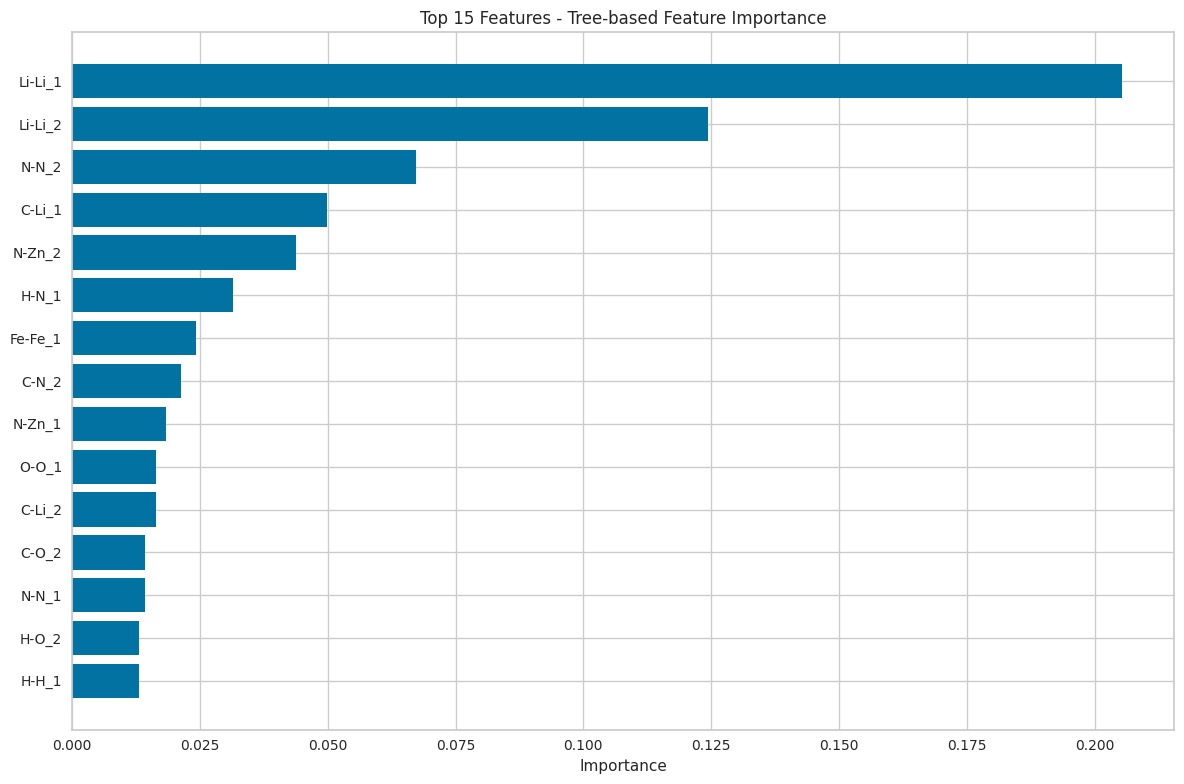


Feature importance saved to: feature_importance.csv

Calculating permutation importance (this may take a moment)...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


Permutation Importance (Top 15):
    Feature  Importance_Mean  Importance_Std
72  Li-Li_1         0.408156        0.030044
73  Li-Li_2         0.015403        0.002082
48  Fe-Fe_1         0.013904        0.002331
12   H-Zn_1         0.012022        0.000730
24    N-N_1         0.004348        0.001415
22    H-N_1         0.004113        0.003531
16   O-Zn_1         0.003059        0.000488
28   N-Zn_1         0.003038        0.001689
62   Cu-N_1         0.003009        0.000489
46   C-Fe_1         0.002758        0.000237
25    N-N_2         0.002522        0.001226
20    C-N_1         0.002202        0.000459
4     C-O_1         0.001885        0.000370
26    N-O_1         0.001148        0.001289
8     H-H_1         0.001137        0.000335


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

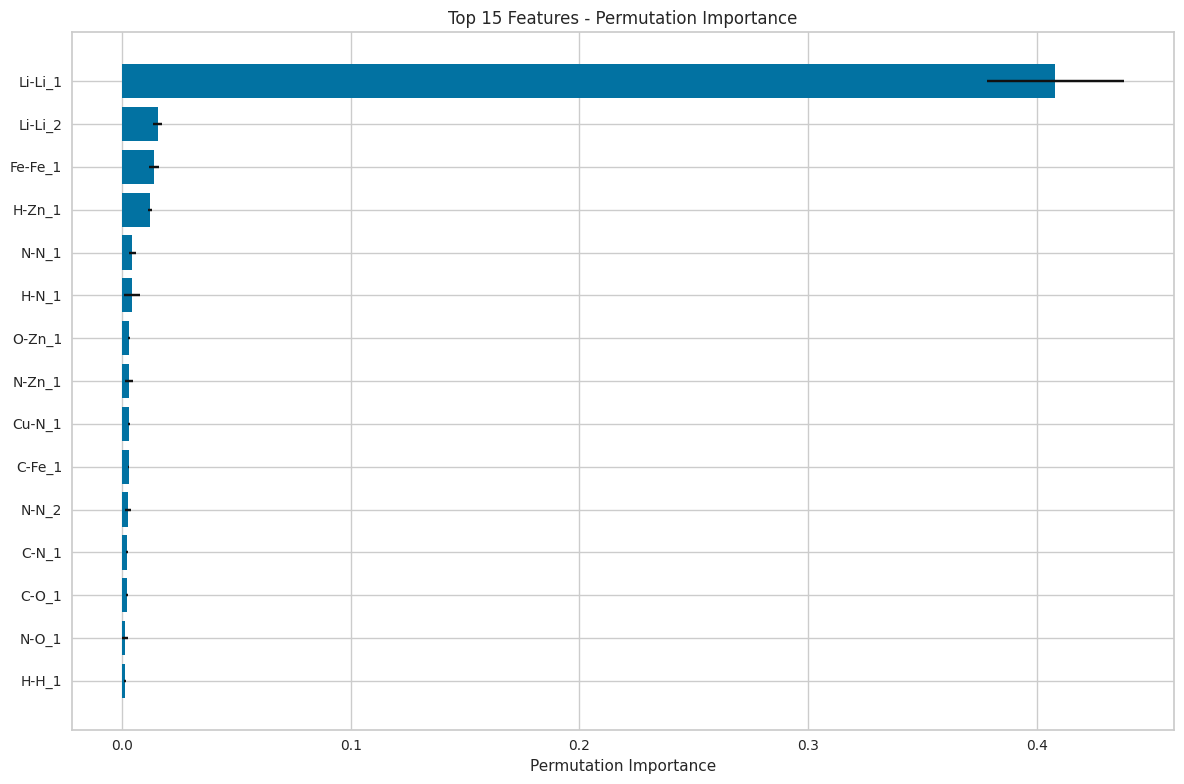


Permutation importance saved to: permutation_importance.csv

Feature importance analysis complete!


In [12]:
# Feature importance analysis
print("Analyzing feature importance...")

try:
    # Try using PyCaret's built-in feature importance
    if TASK_TYPE == 'classification':
        plot_model(tuned_model, plot='feature', display_format='streamlit')
    else:
        plot_model(tuned_model, plot='feature', display_format='streamlit')
except:
    print("PyCaret feature importance not available for this model. Using alternative method...")
    
    # Alternative: Extract feature importance from the model directly
    try:
        # Get the actual sklearn model
        sklearn_model = tuned_model
        
        # Extract feature importance based on model type
        if hasattr(sklearn_model, 'feature_importances_'):
            # Tree-based models (RF, XGBoost, etc.)
            importance_scores = sklearn_model.feature_importances_
            importance_type = "Tree-based Feature Importance"
        elif hasattr(sklearn_model, 'coef_'):
            # Linear models
            importance_scores = np.abs(sklearn_model.coef_).flatten()
            importance_type = "Coefficient Magnitude"
        else:
            print("Feature importance not available for this model type")
            importance_scores = None
        
        if importance_scores is not None:
            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': importance_scores
            }).sort_values('Importance', ascending=False)
            
            print(f"\n{importance_type}:")
            print(feature_importance_df.head(15))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Importance')
            plt.title(f'Top 15 Features - {importance_type}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            # Save feature importance
            feature_importance_df.to_csv('feature_importance.csv', index=False)
            print(f"\nFeature importance saved to: feature_importance.csv")
            
    except Exception as e:
        print(f"Could not extract feature importance: {e}")
        print("This might be a complex ensemble model where feature importance is not directly accessible")

# Alternative: Use permutation importance (works for any model)
try:
    from sklearn.inspection import permutation_importance
    print("\nCalculating permutation importance (this may take a moment)...")
    
    # Get test data
    X_test = get_config('X_test')
    y_test = get_config('y_test')
    
    # Calculate permutation importance
    perm_importance = permutation_importance(tuned_model, X_test, y_test, 
                                           n_repeats=5, random_state=123, n_jobs=-1)
    
    # Create DataFrame
    perm_importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance_Mean': perm_importance.importances_mean,
        'Importance_Std': perm_importance.importances_std
    }).sort_values('Importance_Mean', ascending=False)
    
    print("\nPermutation Importance (Top 15):")
    print(perm_importance_df.head(15))
    
    # Plot permutation importance
    plt.figure(figsize=(12, 8))
    top_perm_features = perm_importance_df.head(15)
    plt.barh(range(len(top_perm_features)), top_perm_features['Importance_Mean'],
             xerr=top_perm_features['Importance_Std'])
    plt.yticks(range(len(top_perm_features)), top_perm_features['Feature'])
    plt.xlabel('Permutation Importance')
    plt.title('Top 15 Features - Permutation Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Save permutation importance
    perm_importance_df.to_csv('permutation_importance.csv', index=False)
    print(f"\nPermutation importance saved to: permutation_importance.csv")
    
except Exception as e:
    print(f"Could not calculate permutation importance: {e}")

print("\nFeature importance analysis complete!")

=== PREDICTIONS vs ACTUAL ===


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.9285,15.5581,3.9444,0.7342,0.4168,0.6936


Test set predictions:


,C-C_1,C-C_2,C-H_1,C-H_2,C-O_1,C-O_2,C-Zn_1,C-Zn_2,H-H_1,H-H_2,...,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2,label,prediction_label
1916,8.141341,0.215581,11.430909,0.119441,4.757848,0.077679,0.213211,0.001733,45.872890,0.719796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.592038,7.794115
1449,8.076920,0.216653,8.991872,0.092058,0.381460,0.009582,0.052687,0.000016,24.189608,0.559950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990804,5.016743
2903,11.381107,0.253290,10.110257,0.067761,0.395054,0.001864,0.017684,0.000008,36.399918,0.555910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.081667,14.902863
2405,7.008209,0.198245,1.724042,0.005083,0.002403,0.000010,0.000000,0.000000,6.252996,0.140979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.887646,25.203445
289,18.809664,0.243373,4.471293,0.061751,0.053458,0.000258,0.000000,0.000000,6.250434,0.179202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.521042,22.748920
134,18.801600,0.239288,4.134468,0.045389,0.033179,0.000287,0.000000,0.000000,6.250434,0.141426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.144391,13.331556
2082,6.695563,0.183699,7.480793,0.077122,0.069020,0.000554,0.000000,0.000000,33.999348,0.585926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.774981,7.693185
235,7.520641,0.210892,0.654850,0.011100,0.061032,0.000225,0.000000,0.000000,8.459778,0.180197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.304096,13.722100
1785,11.339427,0.194140,14.619117,0.176872,0.271396,0.003027,0.045937,0.000013,37.050438,0.579638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.869122,12.613858
198,11.545115,0.243294,1.564372,0.008018,0.075237,0.000129,0.000000,0.000000,6.250434,0.152083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.535263,17.030072


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0795,1.9784,1.4065,0.9681,0.1811,0.4015



Training set predictions:


,C-C_1,C-C_2,C-H_1,C-H_2,C-O_1,C-O_2,C-Zn_1,C-Zn_2,H-H_1,H-H_2,...,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2,label,prediction_label
1738,10.656313,0.244851,9.918231,0.119187,1.482635,0.026264,0.359846,0.006085,27.109745,0.557195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.937751,8.614382
2696,7.077274,0.199008,0.195860,0.005472,3.751148,0.045820,0.123857,0.000202,6.312672,0.088296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.541527,23.726435
2151,13.064514,0.315743,12.522985,0.181731,0.000000,0.000000,0.000000,0.000000,32.588432,0.602962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.818160,6.860694
1768,25.423330,0.285949,18.490862,0.303094,3.733271,0.046565,0.058880,0.000010,33.897469,0.465224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.992709,10.666277
2848,8.423512,0.227563,8.871730,0.035234,0.538055,0.012616,0.089212,0.000044,36.079102,0.523287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.786558,4.581452
841,6.252825,0.178553,0.405436,0.009842,0.065046,0.000026,0.000000,0.000000,8.345493,0.177528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.480794,2.517012
773,14.141564,0.318875,6.220726,0.063858,0.099857,0.000526,0.000000,0.000000,8.310967,0.180509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.023945,6.286024
1584,7.100672,0.201402,1.896767,0.009169,0.344934,0.003040,0.254004,0.000019,6.250434,0.151681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.601225,5.874640
994,9.281669,0.227990,9.523509,0.082415,0.851530,0.015317,0.729302,0.005457,37.762482,0.611930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.106829,19.709628
1456,14.037479,0.324566,12.738409,0.153305,6.230438,0.059955,0.058046,0.000082,40.240688,0.627152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.193730,5.832031


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


=== REGRESSION METRICS ===
Test Set:
  MAE: 2.9285
  RMSE: 3.9444
  R²: 0.7342

Training Set:
  MAE: 1.0795
  RMSE: 1.4065
  R²: 0.9681


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

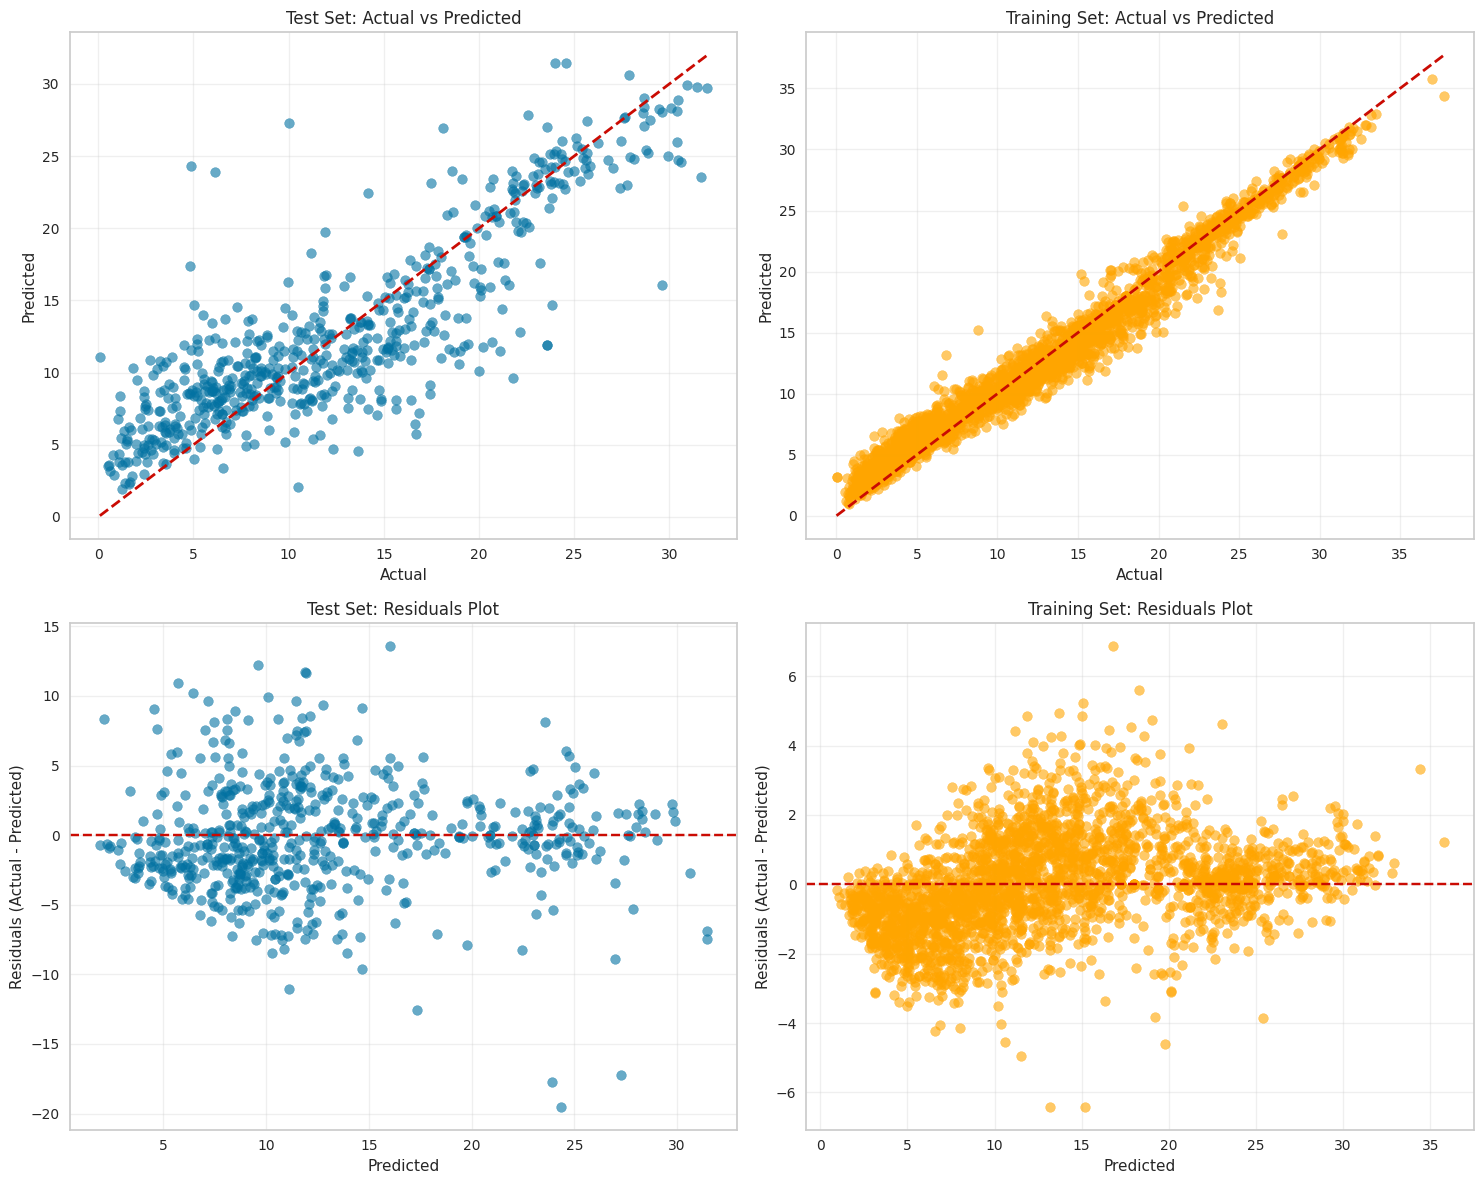


Predictions saved:
- test_predictions.csv (618 samples)
- train_predictions.csv (2471 samples)


In [13]:
# Get predictions on both training and test sets
print("=== PREDICTIONS vs ACTUAL ===")

# Get test set predictions (this includes actual vs predicted)
test_predictions = predict_model(tuned_model)
print("Test set predictions:")
display(test_predictions.head(10))

# Get training set predictions
train_predictions = predict_model(tuned_model, data=get_config('X_train').assign(**{TARGET_COL: get_config('y_train')}))
print("\nTraining set predictions:")
display(train_predictions.head(10))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if TASK_TYPE == 'regression':
    # For regression: scatter plots of actual vs predicted
    
    # Test set
    axes[0,0].scatter(test_predictions[TARGET_COL], test_predictions['prediction_label'], alpha=0.6)
    axes[0,0].plot([test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 
                   [test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual')
    axes[0,0].set_ylabel('Predicted')
    axes[0,0].set_title('Test Set: Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Training set
    axes[0,1].scatter(train_predictions[TARGET_COL], train_predictions['prediction_label'], alpha=0.6, color='orange')
    axes[0,1].plot([train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 
                   [train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual')
    axes[0,1].set_ylabel('Predicted')
    axes[0,1].set_title('Training Set: Actual vs Predicted')
    axes[0,1].grid(True, alpha=0.3)
    
    # Residuals plots
    test_residuals = test_predictions[TARGET_COL] - test_predictions['prediction_label']
    train_residuals = train_predictions[TARGET_COL] - train_predictions['prediction_label']
    
    axes[1,0].scatter(test_predictions['prediction_label'], test_residuals, alpha=0.6)
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicted')
    axes[1,0].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,0].set_title('Test Set: Residuals Plot')
    axes[1,0].grid(True, alpha=0.3)
    
    axes[1,1].scatter(train_predictions['prediction_label'], train_residuals, alpha=0.6, color='orange')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,1].set_title('Training Set: Residuals Plot')
    axes[1,1].grid(True, alpha=0.3)
    
    # Print metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print(f"\n=== REGRESSION METRICS ===")
    print(f"Test Set:")
    print(f"  MAE: {mean_absolute_error(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(test_predictions[TARGET_COL], test_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    
    print(f"\nTraining Set:")
    print(f"  MAE: {mean_absolute_error(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(train_predictions[TARGET_COL], train_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")

else:
    # For classification: confusion matrices and distribution plots
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # Test set confusion matrix
    test_cm = confusion_matrix(test_predictions[TARGET_COL], test_predictions['prediction_label'])
    sns.heatmap(test_cm, annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
    axes[0,0].set_title('Test Set: Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')
    
    # Training set confusion matrix
    train_cm = confusion_matrix(train_predictions[TARGET_COL], train_predictions['prediction_label'])
    sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0,1], cmap='Oranges')
    axes[0,1].set_title('Training Set: Confusion Matrix')
    axes[0,1].set_xlabel('Predicted')
    axes[0,1].set_ylabel('Actual')
    
    # Class distribution comparison
    test_actual = test_predictions[TARGET_COL].value_counts().sort_index()
    test_predicted = test_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(test_actual))
    width = 0.35
    axes[1,0].bar(x_pos - width/2, test_actual.values, width, label='Actual', alpha=0.7)
    axes[1,0].bar(x_pos + width/2, test_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,0].set_xlabel('Classes')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Test Set: Class Distribution')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(test_actual.index)
    axes[1,0].legend()
    
    # Training set class distribution
    train_actual = train_predictions[TARGET_COL].value_counts().sort_index()
    train_predicted = train_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(train_actual))
    axes[1,1].bar(x_pos - width/2, train_actual.values, width, label='Actual', alpha=0.7)
    axes[1,1].bar(x_pos + width/2, train_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_title('Training Set: Class Distribution')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(train_actual.index)
    axes[1,1].legend()
    
    # Print classification reports
    print(f"\n=== CLASSIFICATION METRICS ===")
    print(f"Test Set Classification Report:")
    print(classification_report(test_predictions[TARGET_COL], test_predictions['prediction_label']))
    
    print(f"\nTraining Set Classification Report:")
    print(classification_report(train_predictions[TARGET_COL], train_predictions['prediction_label']))

plt.tight_layout()
plt.show()

# Save predictions to CSV files
test_predictions.to_csv('test_predictions.csv', index=False)
train_predictions.to_csv('train_predictions.csv', index=False)
print(f"\nPredictions saved:")
print(f"- test_predictions.csv ({len(test_predictions)} samples)")
print(f"- train_predictions.csv ({len(train_predictions)} samples)")